# Machine Learning in a Nutshell: Binary Classifier

## A (given) Binary Classifier

To begin, we assume the weights of a binary classifier are given as $w_1 = 1.0$ and $w_2 = 0.5$.
In the second task we are going to learn the weights from data.

We also assume, the feature extractor $\phi(\mathbf{x})$ is given as the identity function. For simplicity, we are working with the extracted feature vectors $[x_1, x_2]$ directly.

### Our classifier

$$
\begin{align}
f_\mathbf{w}(x) &= \text{sign}(\underbrace{[1, 0.5]}_{\mathbf{w}} \cdot \underbrace{[x_1, x_2]}_{\phi(x)})\\
      &= \text{sign}(\underbrace{1}_{w_1} \cdot x_1 + \underbrace{0.5}_{w_2} \cdot x_2)
\end{align}
$$

### The sign-function maps from a score to a label
$$
\begin{equation*}
  \text{sign}(z)=\begin{cases}
    +1, & \text{if $z>0$}\\
    -1, & \text{if $z<0$}\\
     0, & \text{if $z = 0$}.
  \end{cases}
\end{equation*}
$$

### Task 1: Making predictions with the classifier $f$

In order to make predictions, we need to implement $f$ in Python. This requires us to implement the individual pieces as python methods:
- A `getScore` method that computes the **score**: $w_1 \cdot x_1 + w_2 \cdot x_2$
- A `getLabel` method that computes the **label** from a given **score**: $\text{sign}(\cdot)$
- A `predict` method that computes the **label** from two parameters $x_1$ and $x_2$ by calling the other methods.

Define a class and implement the `getScore`, `getLabel` and `predict` methods.
The constructor should expect two parameters $w_0$ and $w_1$ and store the values in instance variables.

In [2]:
import numpy as np # type: ignore
class BinaryClassification:
    
    def __init__ (self, w1,w2):
        self.w1=w1
        self.w2=w2
    
    def get_score(self, x1 ,x2):
      score = self.w1*x1 + self.w2*x2
      return score
  
    def get_lable(self , z):
      if z >0:
         return +1  
      elif z <0:
         return -1
      else :
         return 0 
     
    def predict(self, x1 , x2):
        score=self.get_score(x1 , x2)
        predict=self.get_lable(score)
        return predict
    
    def get_margin (self , x1 ,x2 ,y):
        return self.get_score(x1,x2)*y
    
    def getHingLoss(self , x1,x2,y, minMargin=1.0):
        return max((minMargin-self.get_margin(x1,x2,y) , 0))
    
    def train(self,x1:float,x2 :float,y:int,lerningRate:float=0.1):
        loss = self.getHingLoss(x1,x2,y,)
        if loss >0:
            self.w1 += lerningRate * y *x1
            self.w2 += lerningRate * y *x2
        
    def verbosePrediction (self, x1,x2,y):
     print(f'{x1} and {x2} ---> the predicted lable is {self.predict(x1,x2)} , the target lable is {y} and the Margin is {self.get_margin (x1,x2,y)}  finally the hing Loss is {self.getHingLoss(self , x1,x2,y):} ')  
           
    def train_batch (self , point:list , y:list , lerningRate:float=0.1) :
        grediant_dessend=[]
        running_loss =[]
        
        for x , y in zip(point , y):
            loss=self.getHingLoss(x[0],x[1], y)
            running_loss.append(loss)
            if loss >0:
                grediant_dessend.append(-x[0]*y , -x[1]*y)
     
        self.w1-=lerningRate *np.mean(p[0]for p in grediant_dessend)
        self.w2-=lerningRate *np.mean(p[1]for p in grediant_dessend)


### 

### Task 2: Multiple predictions and the target labels

Below you are given a list of training examples.
Each training example comes with a target label.

The target label is the label our classifier should predict, ... but most likely it doesn't since we did not train it yet.

Let's first make the classifier predict a label for each training example and print the predicted label next to the target label such we can see when things go wrong.

#### Implement printing as a method of `BinaryClassifier`, named `verbosePrediction` that expects $x_1$, $x_2$ and $y$ as parameters and prints, for each training example, the predicted label and the target label and if it is correct.

In [ ]:


w1=1.0
w2=0.5

classifer = BinaryClassification(w1,w2)


data = [(0.5, 0.5), (2, 0), (-1, 1), (1, -1), (1, -2), (-1, -1)]
labels = [1, 1, 1, -1, -1, -1]

for x, y in zip(data, labels):
    # commented out, because it won't work right from the start. you have to implement the methods first in BinaryClassifier
    print(f'{classifer.predict(x[0], x[1])} == {y}?')
    print(classifer.predict(x[0], x[1]) == y)
    classifer.verbosePrediction(x[0], x[1], y)
    classifer.verbosePrediction(x, y)


### Task 3: Compute the margin

Recall, the **score** of a training example is positive if the angle between the feature vector of the training example and the weight vector is acute. And the score is negative if the angle is obtuse.
$$
\mathbf{w} \cdot \mathbf{x} = \Vert \mathbf{w} \Vert \cdot \Vert \mathbf{x} \Vert \cdot \cos(\omega)
$$

All points in feature space with a score = 0, constitute the decision boundary of the classifier.

Now, the **margin** takes the score and the target label and quantifies the correctness of a prediction:
$$
\text{margin}(\mathbf{x}, y, \mathbf{w}) = (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y
$$

The margin is positive if the score and the target label agree (regardless of which class it is). It is negative, if both quantities disagree.

Add a method `getMargin` to your implementation and, additionally, print the margin for each training example in the `predictVerbose` method.


### Task 4: Compute the Hinge-Loss of the classifier

Based on the margin, we can now calculate the Hinge-Loss of the classifier.

Like any other loss, the Hinge Loss is large if the classifier's prediction does **not** agree with the target label.
This is the exact opposite of what the margin tells us.

Thus, we can just use the negative margin to indicate disagreement between prediction and target label.

$$
\text{Loss}_{hinge}(x, y, \mathbf{w}) = \max \{ \text{gap} - \underbrace{\underbrace{(\mathbf{w} \cdot \mathbf{x})}_{\text{score}}y}_{\text{margin}}, 0 \}
$$

Intuitively, what is the role of $\text{gap}$?
- What if $gap = 0$?
- What if $gap > 0$?

Hint: Think about the closeness of training points to the decision boundary (Or rather the closeness of the decision boundary to the training points, since it's up to us to adjust the decision boundary based on the loss).
![](linear-classifier-decision-boundary.png)

Implement a method `getHingeLoss` that expects parameters $x_1$, $x_2$ and, additionally, a keyword parameter `gap` with a default value of $1.0$.

### Task 5: Implement the weight update

Based on the hinge loss, we can construct a weight update rule and repeatedly update the weights.

The goal of repeated weight updates is to adjust the decision boundary of the classifier, such that it classifies the training examples correctly.

For each training example, we calculate the weight change $\Delta \mathbf{w}$ and then update the weights using $\Delta \mathbf{w}$. The update rule is given as:

$$
\mathbf{w} = \mathbf{w} - 0.1 \cdot \Delta \mathbf{w}
$$

where the weight change is given by:

$$
\begin{align}
\Delta \mathbf{w}  = \begin{cases}
    - [x_1 \cdot y, x_2 \cdot y], & \qquad \text{if} \quad \text{Loss}_{hinge}(\mathbf{x}, y, \mathbf{w}) > 0\\
    0, & \qquad \text{otherwise}.
  \end{cases}
\end{align}
$$

Note: We obtain the weight change by calculating the partial derivatives of the loss with respect to each weight. Example for $w_1$:
$$
\begin{align}
\frac{\partial \text{Loss}_{hinge}(\mathbf{x}, y, \mathbf{w})}{\partial w_1} &= \frac{\partial}{\partial w_1} (\text{gap} - (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y)\\
   &= \frac{\partial}{\partial w_1} \text{gap} - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y)\\
   &= 0 - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot \frac{\partial}{\partial (w_1 \cdot x_1 + w_2 \cdot x_2)} (w_1 \cdot x_1 + w_2 \cdot x_2) \cdot y \\
   &= 0 - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 \cdot + w_2 \cdot x_2)  \cdot y\\
   &= 0 - \frac{\partial}{\partial w_1} (w_1 \cdot x_1 \cdot y)  \cdot y\\
   &= - x_1 \cdot y\\
\end{align}
$$

The derivates for $w_2$ are computed analogously.
The weight change $\Delta \mathbf{w}$ is just the vector of these partial derivatives.

#### Implement the update rule in a method `train`. This method expects $x_1$, $x_2$ and $y$ as parameters. You may also include an optional `eta` parameter for the learning rate, which is currently set to a fixed 0.1.

### Task 6: Implement Stochastic Gradient Descent in the method `train_batch`.
Computing updates on each training example is computationally expensive and does not yield a good sample of our ground truth. 
Instead, we should compute the updates on multiple training examples as their average.
This also greatly reduces the variance of the updates and should lead to a more stable convergence.
All you need to do is compute the average of the weight changes for each training example and update the weights accordingly.

### Congratulations! You have implemented the core machinery of machine learning algorithms.

# Bonus Task: Apply the classifier to a larger synthetic dataset and visualize the dataset as a 2d plot

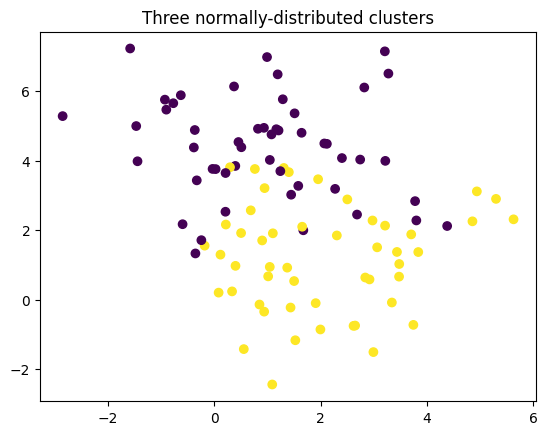

In [1]:
import matplotlib.pyplot as plt # type: ignore
from sklearn.datasets import make_blobs # type: ignore

X, y = make_blobs(n_samples=100, centers=2, cluster_std=1.5, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Three normally-distributed clusters")
plt.show()

In [ ]:
# TODO use 10 samples and run a couple of times. see what happens to the loss and how long it would take to converge


## Bonus Task: plot how the loss changes with each batch. for this you have to keep track of the loss in the train_batch method or in the loop where you call it
You can use `plt.plot` to plot the loss over time